classify the Size_Categorie using SVM

month	month of the year: 'jan' to 'dec'
day	day of the week: 'mon' to 'sun'
FFMC	FFMC index from the FWI system: 18.7 to 96.20
DMC	DMC index from the FWI system: 1.1 to 291.3
DC	DC index from the FWI system: 7.9 to 860.6
ISI	ISI index from the FWI system: 0.0 to 56.10
temp	temperature in Celsius degrees: 2.2 to 33.30
RH	relative humidity in %: 15.0 to 100
wind	wind speed in km/h: 0.40 to 9.40
rain	outside rain in mm/m2 : 0.0 to 6.4
Size_Categorie 	the burned area of the forest ( Small , Large)

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import svm
from sklearn.svm import SVC

In [25]:
df = pd.read_csv('forestfires.csv')
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [26]:
df=df.iloc[:,[0,1,2,3,4,5,6,7,8,9,-1]]
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,small


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  size_category  517 non-null    object 
dtypes: float64(7), int64(1), object(3)
memory usage: 44.6+ KB


In [14]:
df.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
size_category    0
dtype: int64

In [15]:
df.shape

(517, 11)

<AxesSubplot:>

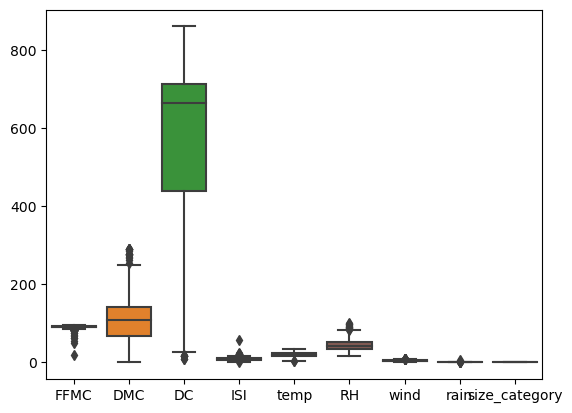

In [62]:
sns.boxplot(data=df)

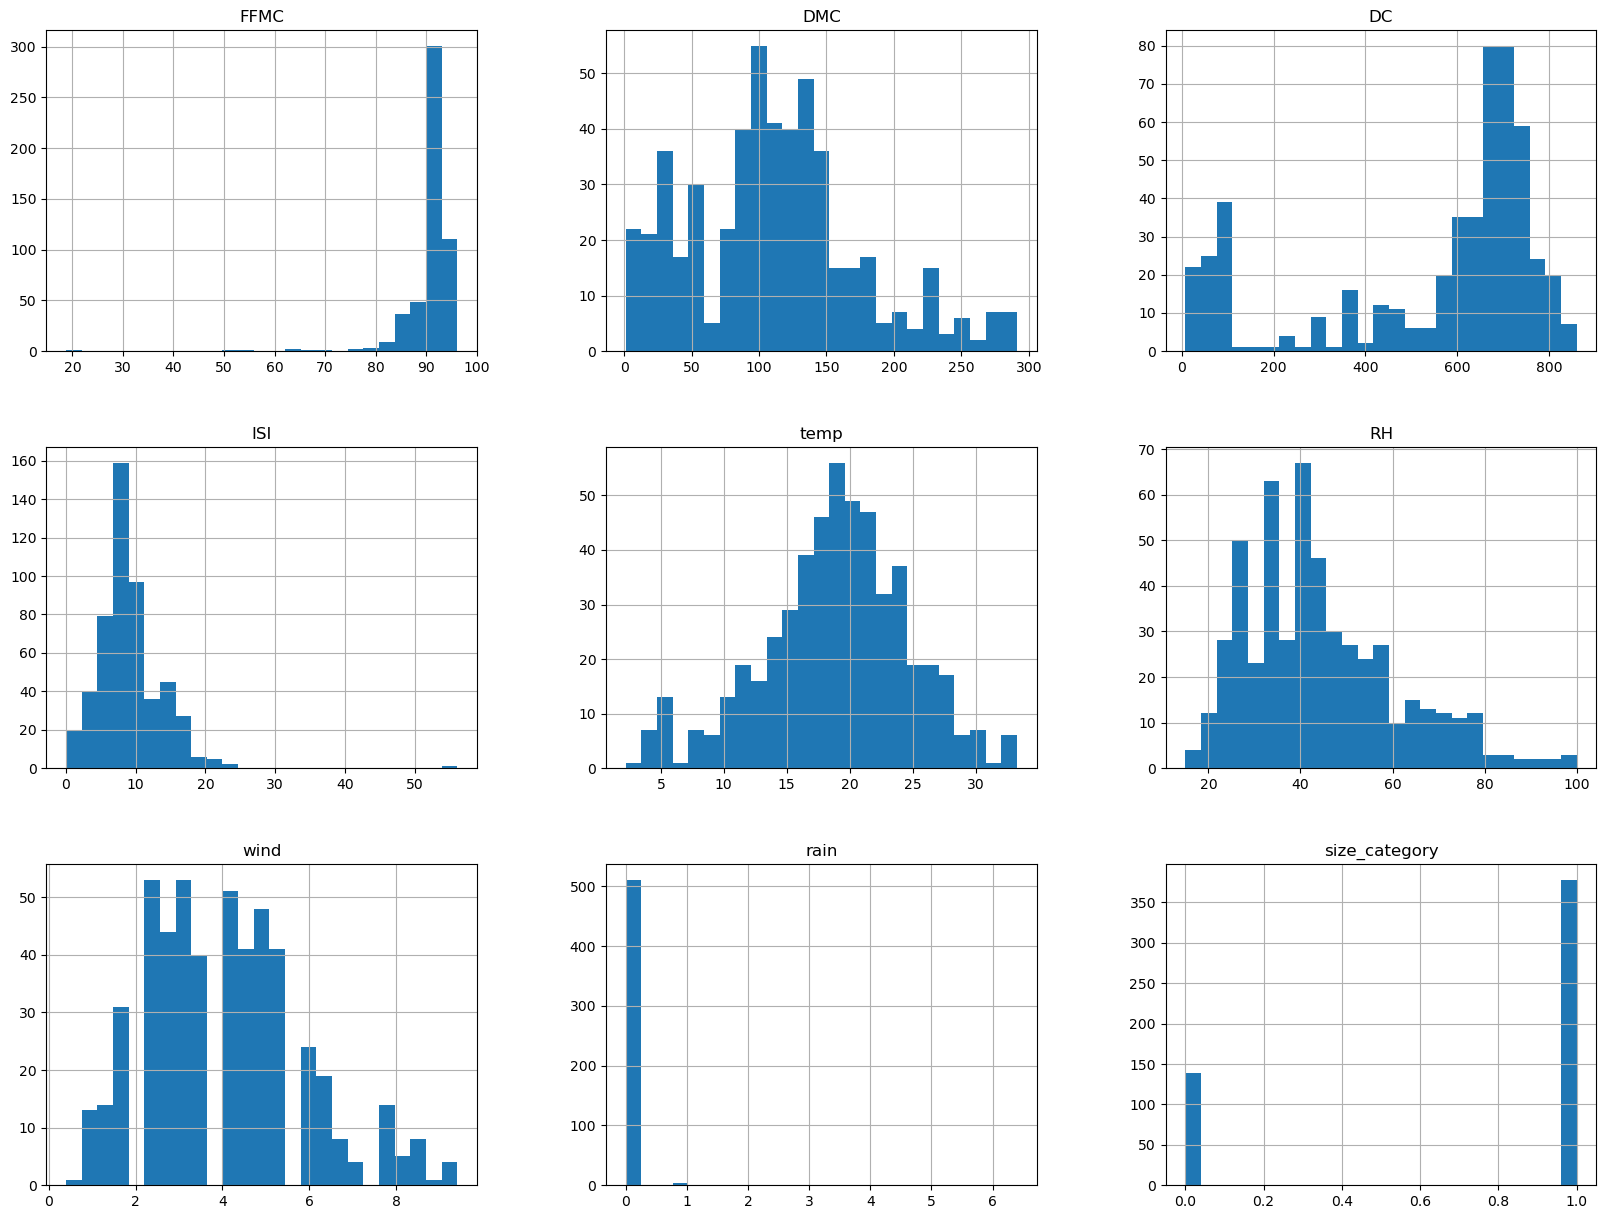

In [63]:
df.hist(bins=25, figsize=(20,15))
plt.show()

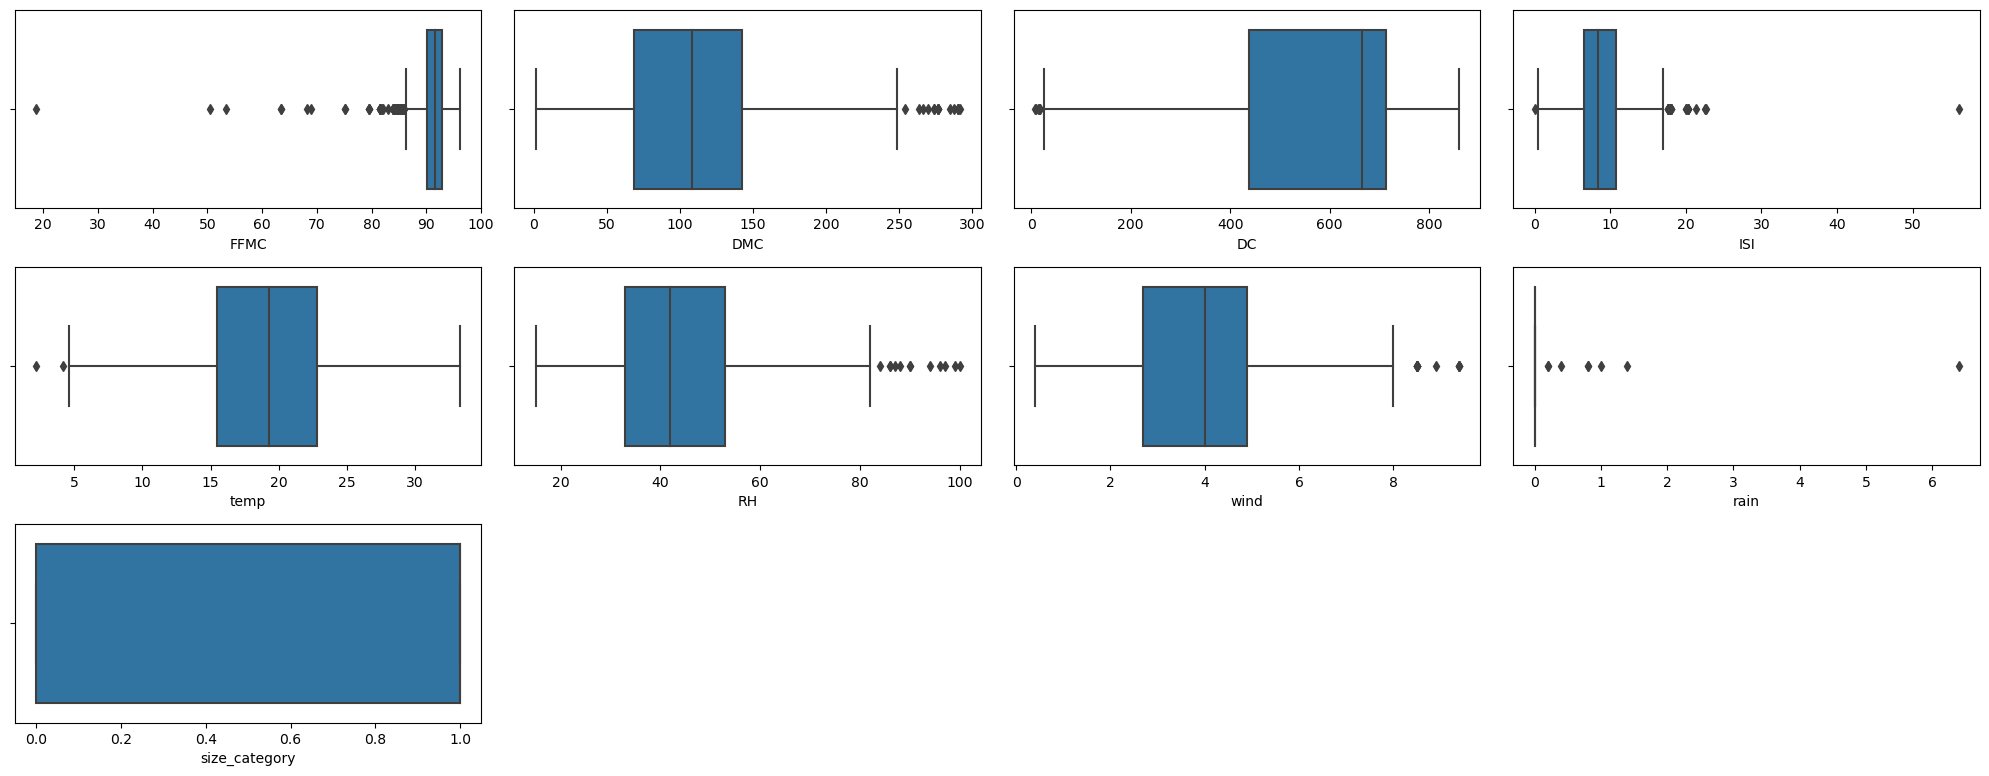

In [64]:
import matplotlib.pyplot as plt
c=4
r=4
col=df.select_dtypes(exclude='object').columns
size=plt.figure(figsize=(20,10))
for i,co in enumerate(col):
    axis=size.add_subplot(r,c,i+1)
    sns.boxplot(x=df[co],ax=axis)
size.tight_layout()
plt.show()

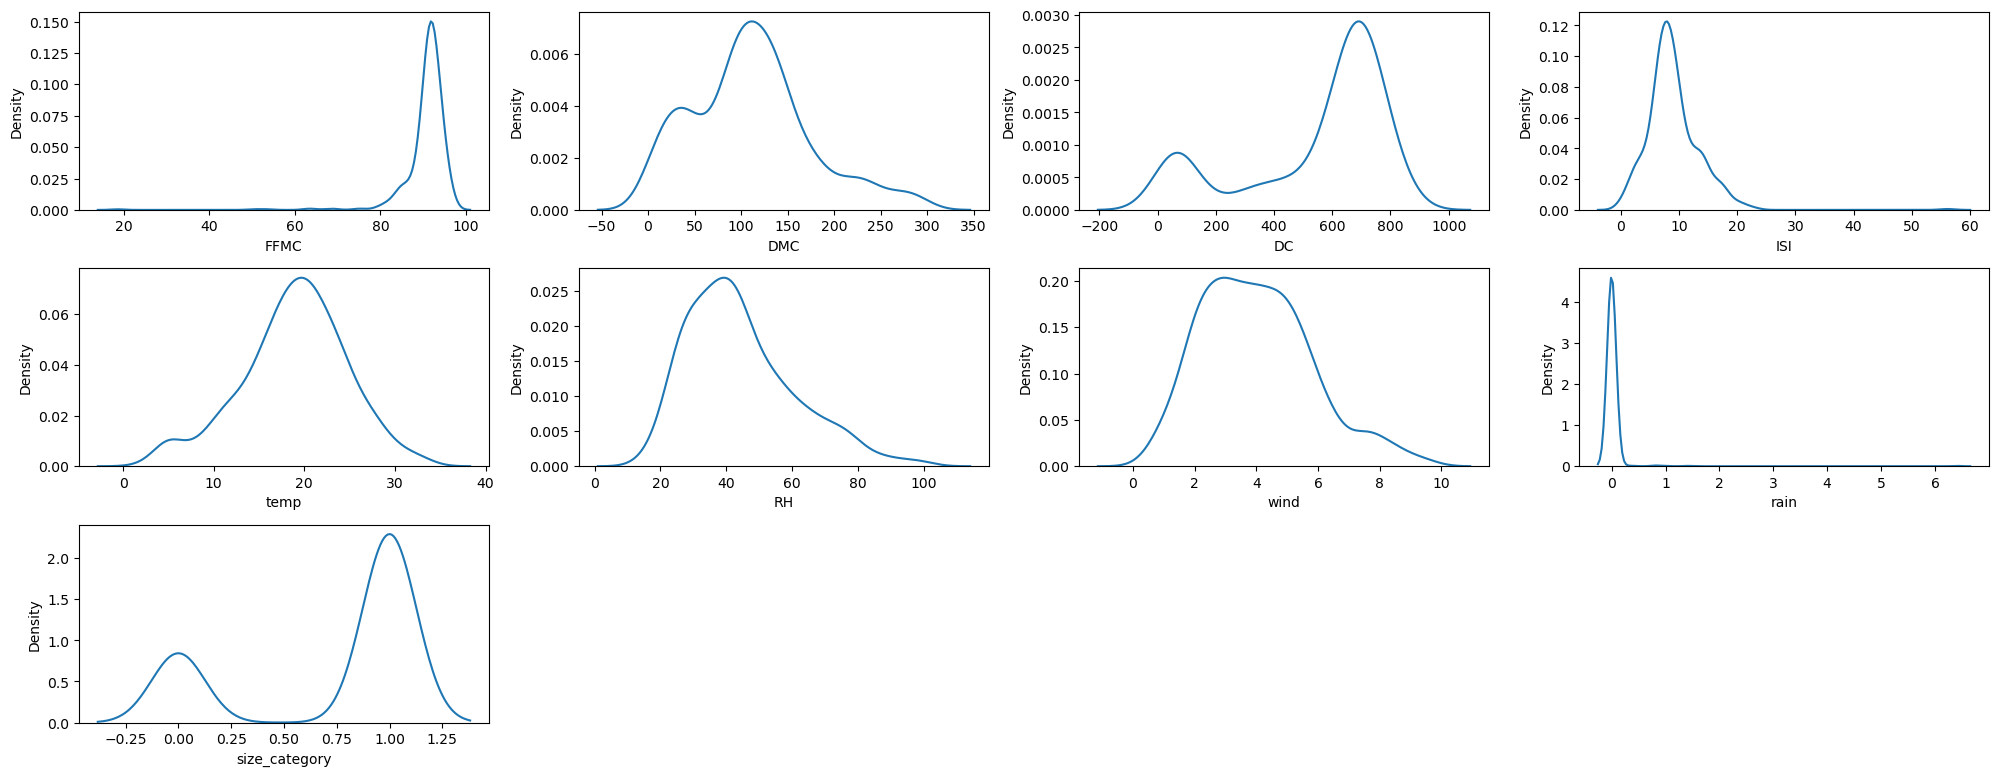

In [65]:
import matplotlib.pyplot as plt
c=4
r=4
col=df.select_dtypes(exclude='object').columns
size=plt.figure(figsize=(20,10))
for i,co in enumerate(col):
    axis=size.add_subplot(r,c,i+1)
    sns.kdeplot(x=df[co],ax=axis)
size.tight_layout()
plt.show()

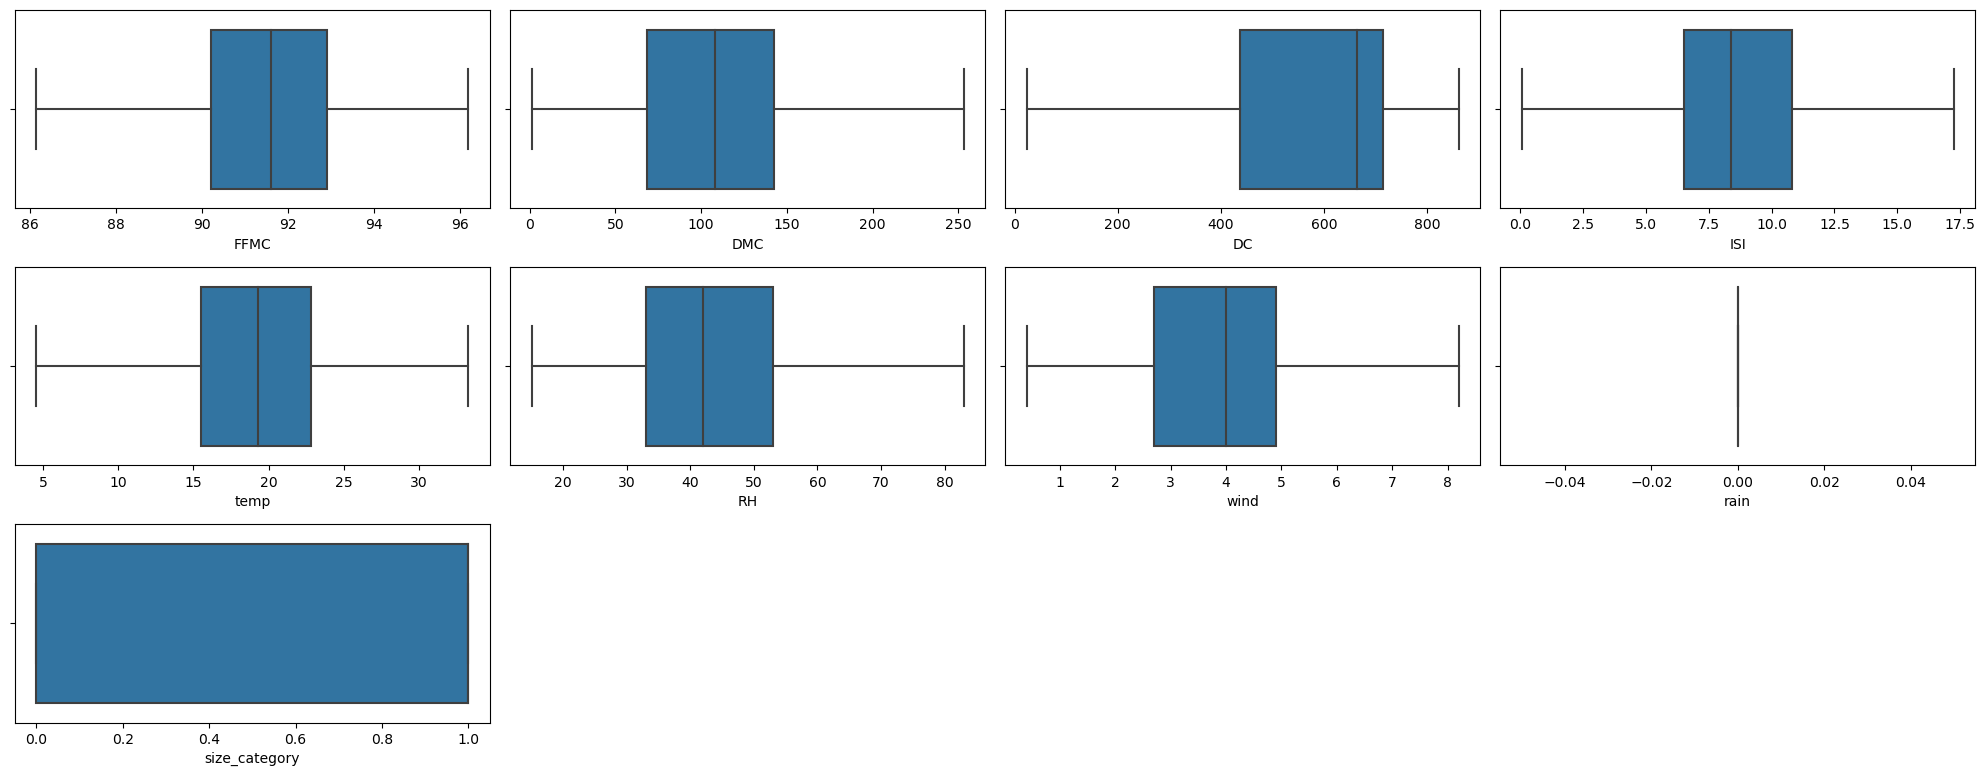

In [69]:
c=4
r=4
col=df.select_dtypes(exclude='object').columns
size=plt.figure(figsize=(20,10))
for i,co in enumerate(col):
    axis=size.add_subplot(r,c,i+1)
    sns.boxplot(x=df[co],ax=axis)
size.tight_layout()
plt.show()

In [66]:
def treatoutlier(df,cols):
    for col in cols:
        
        Q1=df[col].quantile(0.25)
        Q3=df[col].quantile(0.75)
        IQR=Q3-Q1
    
        upper=Q3+1.5*IQR
        lower=Q1-1.5*IQR
    
        df[col]=np.where(df[col]>upper,upper,np.where(df[col]<lower,lower,df[col]))
    
treatoutlier(df,df.columns)

<AxesSubplot:>

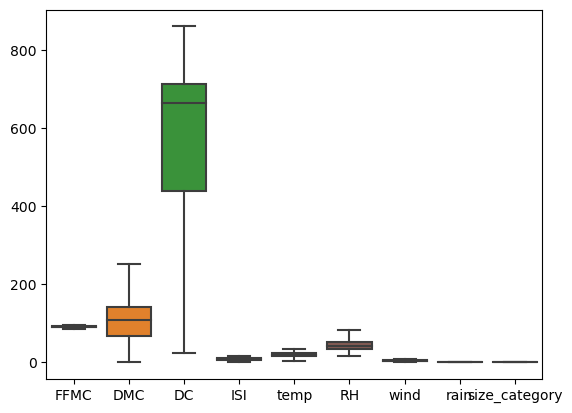

In [67]:
sns.boxplot(data=df)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


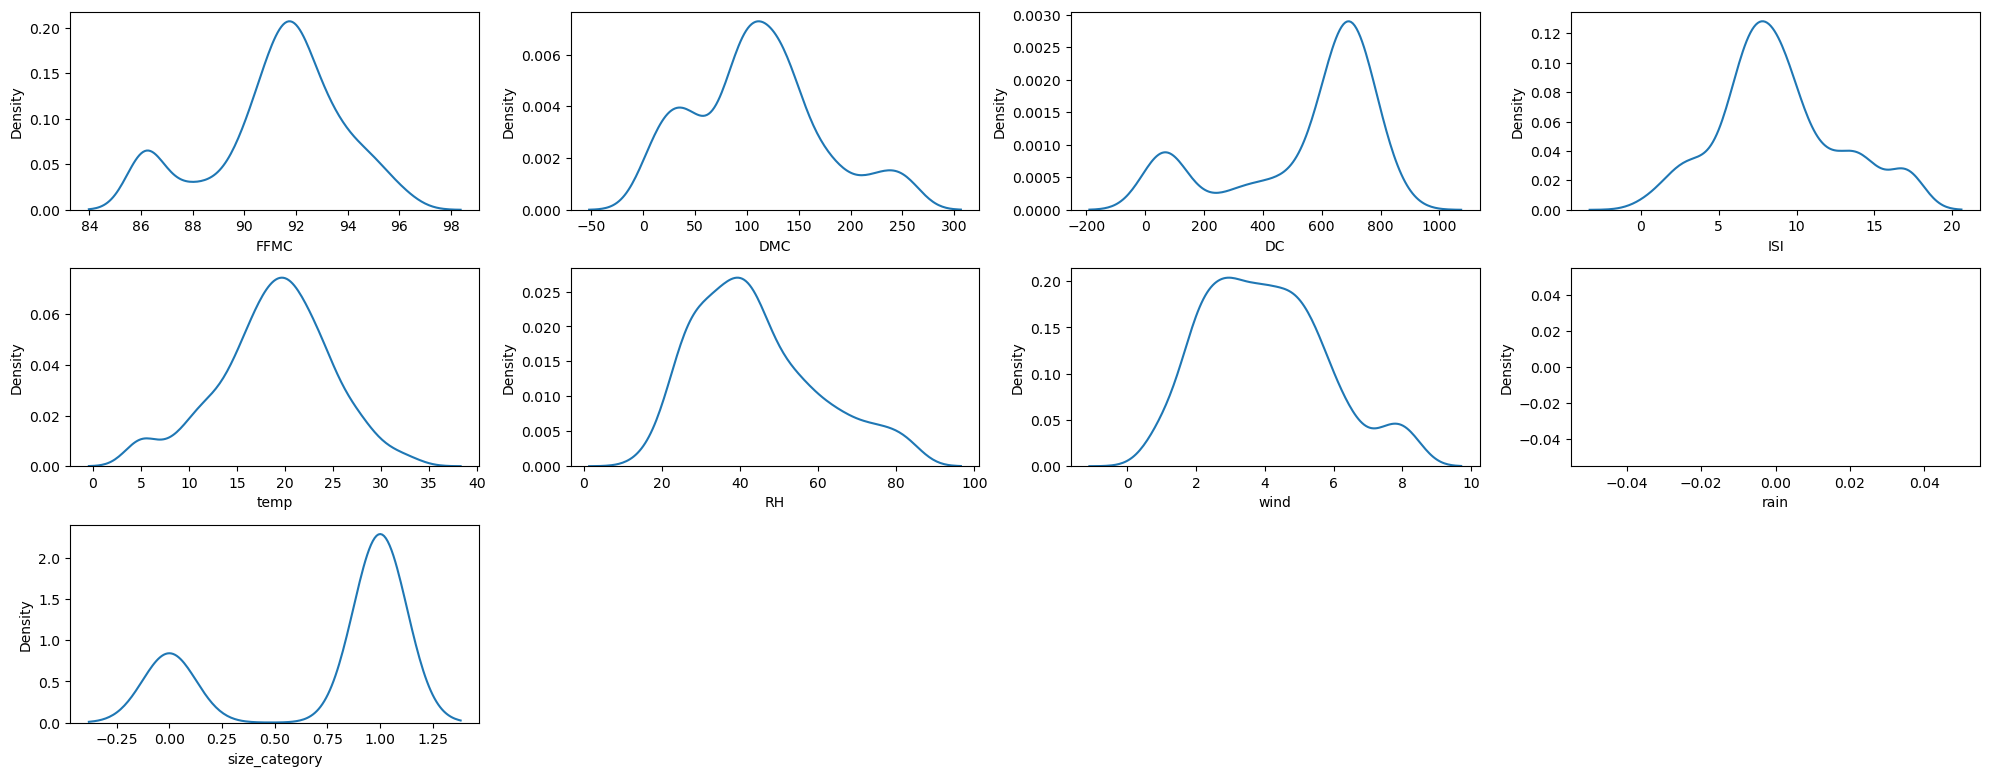

In [68]:
c=4
r=4
col=df.select_dtypes(exclude='object').columns
size=plt.figure(figsize=(20,10))
for i,co in enumerate(col):
    axis=size.add_subplot(r,c,i+1)
    sns.kdeplot(x=df[co],ax=axis)
size.tight_layout()
plt.show()

In [16]:
df[df.duplicated()].shape

(19, 11)

In [17]:
f_df = df.drop_duplicates()
f_df.shape

(498, 11)

In [44]:
from sklearn.preprocessing import LabelEncoder
df['size_category']=LabelEncoder().fit_transform(df['size_category'])

In [70]:
df.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,size_category
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.0,517.000000
mean,91.302224,110.047969,548.079884,8.869729,18.894391,44.092843,4.002321,0.0,0.731141
std,2.523609,61.982439,247.766761,3.882927,5.792743,15.772212,1.751631,0.0,0.443796
min,86.150000,1.100000,23.400000,0.050000,4.550000,15.000000,0.400000,0.0,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.0,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.0,1.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.0,1.000000
max,96.200000,253.100000,860.600000,17.250000,33.300000,83.000000,8.200000,0.0,1.000000


In [71]:
df.corr()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,size_category
FFMC,1.000000,0.534013,0.467209,0.795081,0.631504,-0.283575,-0.084672,NaN,-0.001282
DMC,0.534013,1.000000,0.689109,0.374797,0.490311,0.072017,-0.108018,NaN,-0.030713
DC,0.467209,0.689109,1.000000,0.289050,0.496286,-0.027162,-0.197459,NaN,-0.019385
ISI,0.795081,0.374797,0.289050,1.000000,0.444847,-0.155914,0.112156,NaN,-0.000965
temp,0.631504,0.490311,0.496286,0.444847,1.000000,-0.524971,-0.223913,NaN,-0.007259
RH,-0.283575,0.072017,-0.027162,-0.155914,-0.524971,1.000000,0.079884,NaN,0.044273
wind,-0.084672,-0.108018,-0.197459,0.112156,-0.223913,0.079884,1.000000,NaN,-0.058280
rain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
size_category,-0.001282,-0.030713,-0.019385,-0.000965,-0.007259,0.044273,-0.058280,NaN,1.000000


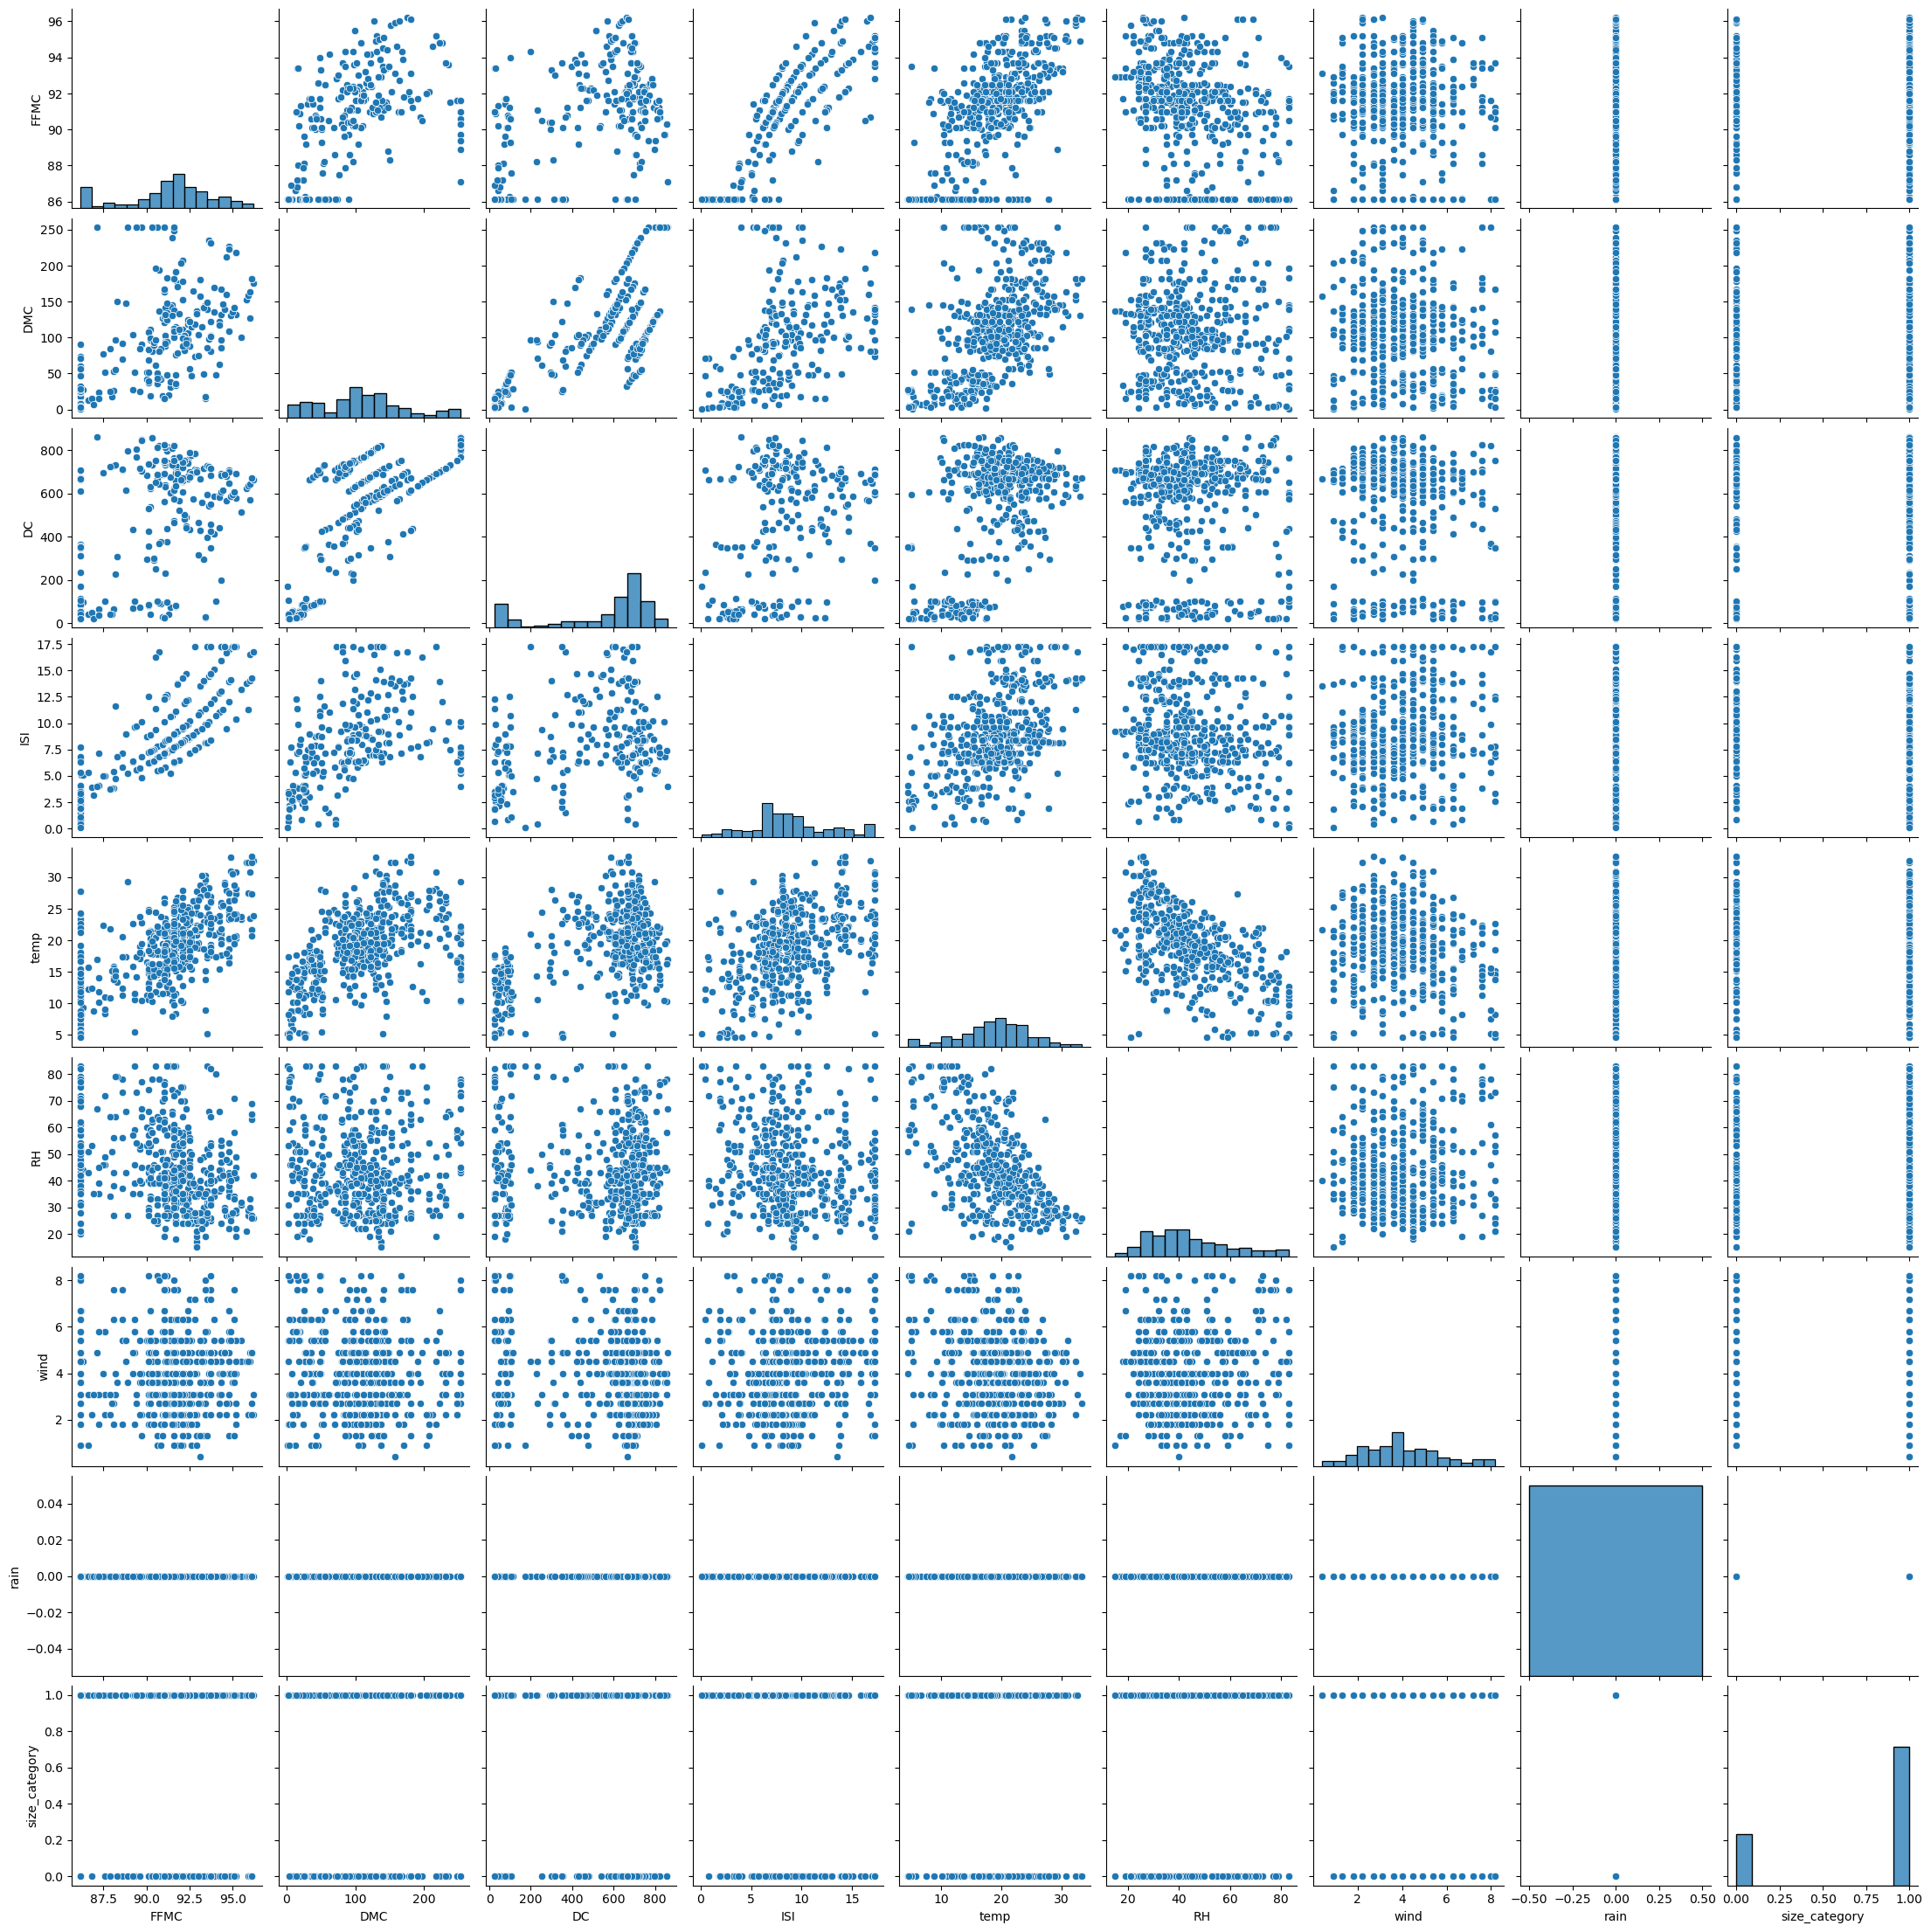

In [72]:
sns.pairplot(df)

In [21]:
counts = f_df.size_category.value_counts().reset_index().rename(columns={'index':'size_category','size_category':'counts'})
counts

,size_category,counts
0,small,365
1,large,133


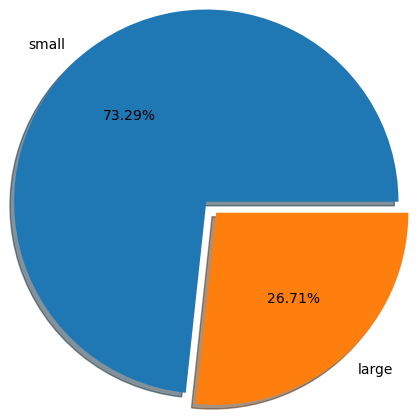

In [22]:
# showing the size_category by pie plot
plt.pie(counts.counts, labels=counts['size_category'],autopct='%.2f%%', shadow=True, radius=1.3,  explode=(0,0.1))
plt.show()

In [27]:
month_f = df.groupby(['size_category', 'month']).size().reset_index().rename(columns={0:'count'}).sort_values('count',ascending=False)
month_f

,size_category,month,count
11,small,aug,141
21,small,sep,121
9,large,sep,51
1,large,aug,43
17,small,mar,42
15,small,jul,23
16,small,jun,14
13,small,feb,14
6,large,mar,12
20,small,oct,11


In [28]:
day_f = df.groupby(['size_category','day']).size().reset_index().rename(columns={0:'count'}).sort_values('count',ascending=False)
day_f

,size_category,day,count
10,small,sun,68
7,small,fri,64
9,small,sat,58
8,small,mon,55
11,small,thu,48
12,small,tue,44
13,small,wed,41
3,large,sun,27
2,large,sat,26
0,large,fri,21


Text(0.5, 1.02, 'Counts of fires on each day')

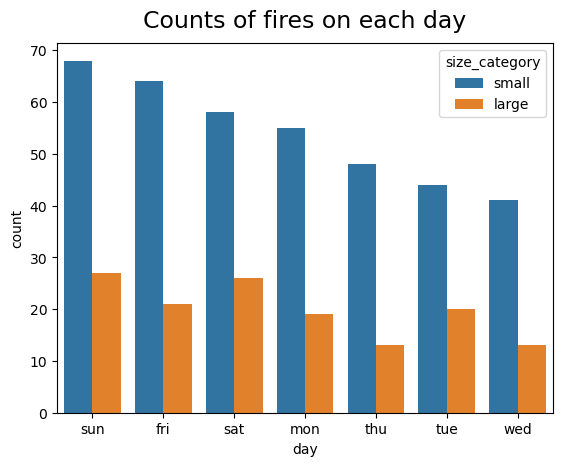

In [29]:
# ploting bar plot for finding number of fires on each day
sns.barplot(x='day',y='count', hue='size_category',data=day_f)
plt.title("Counts of fires on each day", fontsize=17, y=1.02)

In [73]:
X = df.iloc[:,:-1]
Y = df['size_category']

In [74]:
X

,FFMC,DMC,DC,ISI,temp,RH,wind,rain
0,86.20,26.2,94.3,5.1,8.2,51.0,6.7,0.0
1,90.60,35.4,669.1,6.7,18.0,33.0,0.9,0.0
2,90.60,43.7,686.9,6.7,14.6,33.0,1.3,0.0
3,91.70,33.3,77.5,9.0,8.3,83.0,4.0,0.0
4,89.30,51.3,102.2,9.6,11.4,83.0,1.8,0.0
...,...,...,...,...,...,...,...,...
512,86.15,56.7,665.6,1.9,27.8,32.0,2.7,0.0
513,86.15,56.7,665.6,1.9,21.9,71.0,5.8,0.0
514,86.15,56.7,665.6,1.9,21.2,70.0,6.7,0.0
515,94.40,146.0,614.7,11.3,25.6,42.0,4.0,0.0


In [75]:
Y

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
512    0.0
513    0.0
514    0.0
515    1.0
516    1.0
Name: size_category, Length: 517, dtype: float64

In [76]:
from sklearn.preprocessing import StandardScaler
X=StandardScaler().fit_transform(X)

In [77]:
x_train, x_test, y_train, y_test = train_test_split(df, Y, test_size=0.3)

In [78]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((361, 9), (156, 9), (361,), (156,))

### Building SVM Model

In [79]:
# kernal= linear, rbf= polynomial
model=SVC(kernel='poly',gamma=0.001) 
model.fit(x_train,y_train)

y_pred = model.predict(x_test)

acc = accuracy_score(y_test,y_pred)*100
print("Test Accuracy=",acc)

confusion_matrix(y_test, y_pred) 

Test Accuracy= 99.35897435897436


array([[ 46,   0],
       [  1, 109]], dtype=int64)

### Using Gridsearch CV to find the best hyper praameters

In [55]:
model = SVC()
param_grid = [{'kernel':['linear','rbf','poly'],'C':[13,12,11,10,0.1,0.01],'gamma':[10,1,0.5,0.01,0.001,0.0001]}]
gsv = GridSearchCV(model, param_grid, cv=10)
gsv.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [13, 12, 11, 10, 0.1, 0.01],
                          'gamma': [10, 1, 0.5, 0.01, 0.001, 0.0001],
                          'kernel': ['linear', 'rbf', 'poly']}])

In [80]:
gsv.best_params_

{'C': 13, 'gamma': 10, 'kernel': 'linear'}

In [81]:
best_model = SVC(kernel='poly',C=13, gamma=10)
best_model.fit(x_train, y_train)
y_pred = best_model.predict(x_test)
acc = accuracy_score(y_pred, y_test)
print("Test Accuracy= ",acc)

Test Accuracy=  0.9935897435897436


In [82]:
confusion_matrix(y_test, y_pred)

array([[ 46,   0],
       [  1, 109]], dtype=int64)

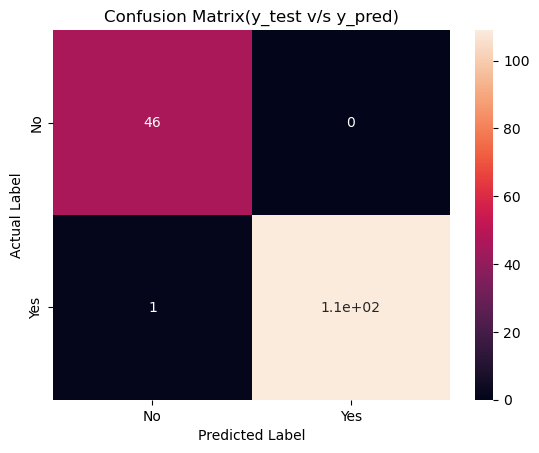

In [83]:
# Ploting the Confusion matrix
cm_f=confusion_matrix(y_test, y_pred)
class_label = ["No", "Yes"]
f_cm = pd.DataFrame(cm_f, index = class_label, columns = class_label)
sns.heatmap(f_cm, annot = True)
plt.title("Confusion Matrix(y_test v/s y_pred)")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()